In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import OneHotEncoder

train = pd.read_csv('train.csv')
remove_num = ['GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'TotRmsAbvGrd']
train = train.drop(remove_num,axis=1)
remove_cat = ['Street', 'LandContour', 'Utilities', 
              'LandSlope', 'Condition1', 'Condition2', 
              'RoofMatl','BsmtCond', 'BsmtFinType2', 
              'Heating', 'GarageCond', 'GarageQual', 'Functional'] 
train = train.drop(remove_cat, axis=1)

In [2]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,drop='first')
data_obj = ohe.fit_transform(train[train.columns[train.dtypes=='object']])

obj_df = pd.DataFrame(data_obj,columns=ohe.get_feature_names(train.columns[train.dtypes=='object']))
cat_columns = obj_df.columns

train = pd.concat([train[train.columns[train.dtypes!='object']], 
                         obj_df],
                        axis=1)

In [3]:
train=(train-train.min())/(train.max()-train.min())

low_var = train.columns[train.var()<.001]
print(low_var)
train = train.drop(columns=low_var,axis=0)

Index(['Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po',
       'HeatingQC_Po', 'Electrical_Mix', 'Electrical_nan', 'MiscFeature_TenC'],
      dtype='object')


In [4]:
train.columns[train.isna().any()].tolist()

['LotFrontage', 'MasVnrArea']

In [5]:
train = train.fillna(0)

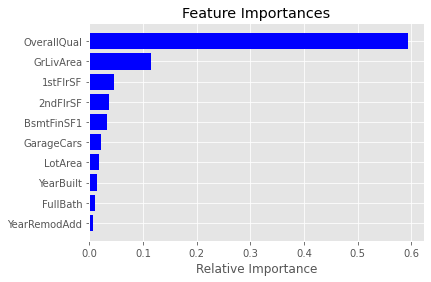

In [6]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [7]:
corr_vals = train.corr(method='pearson')
sorted_corr_vals = corr_vals['SalePrice'].sort_values(ascending=False)
temp = sorted_corr_vals.to_frame(name='corr')
temp.head(15)

,corr
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
1stFlrSF,0.605852
FullBath,0.560664
YearBuilt,0.522897
YearRemodAdd,0.507101
Foundation_PConc,0.497734
MasVnrArea,0.472614


In [8]:
Neighborhood = [col for col in train.columns if 'Neighborhood' in col]
ExterQual = [col for col in train.columns if 'ExterQual' in col]

features = ['OverallQual', 'GarageCars', 'FullBath', 
            'YearBuilt', '2ndFlrSF', 'MasVnrArea', 
            'LotArea', 'GrLivArea'] + Neighborhood + ExterQual

train[features]

,OverallQual,GarageCars,FullBath,YearBuilt,2ndFlrSF,MasVnrArea,LotArea,GrLivArea,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,0.666667,0.50,0.666667,0.949275,0.413559,0.122500,0.033420,0.259231,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.555556,0.50,0.666667,0.753623,0.000000,0.000000,0.038795,0.174830,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.666667,0.50,0.666667,0.934783,0.419370,0.101250,0.046507,0.273549,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.75,0.333333,0.311594,0.366102,0.000000,0.038561,0.260550,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.777778,0.75,0.666667,0.927536,0.509927,0.218750,0.060576,0.351168,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.50,0.666667,0.920290,0.336077,0.000000,0.030929,0.247362,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,0.555556,0.50,0.666667,0.768116,0.000000,0.074375,0.055505,0.327619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.666667,0.25,0.666667,0.500000,0.557869,0.000000,0.036187,0.377920,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.444444,0.25,0.333333,0.565217,0.000000,0.000000,0.039342,0.140166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
data = pd.read_csv('train.csv')
train['RelAge'] = data['YrSold'] - data['YearRemodAdd'] + data['MoSold']/12
train['TotRmsAbvGrdBath'] = data[['TotRmsAbvGrd', 'FullBath', 'HalfBath']].sum(axis=1)
train['PorchDeckRank'] = data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)

new_features = ['RelAge','TotRmsAbvGrdBath','PorchDeckRank']

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train[features])
x_pca = pd.DataFrame(x_pca)

explained_variance = pca.explained_variance_ratio_
explained_variance
np.cumsum(pca.explained_variance_ratio_)

array([0.3292513 , 0.41212397, 0.47227141, 0.52438421, 0.57037526,
       0.6088599 , 0.64651598, 0.68077706, 0.711955  , 0.74038864,
       0.76820735, 0.79403366, 0.81672127, 0.83854254, 0.85738662,
       0.87482318, 0.89002873, 0.9035582 , 0.91608344, 0.92785764,
       0.93878284, 0.94916312, 0.9582522 , 0.96569067, 0.97215939,
       0.97749902, 0.98256594, 0.98685698, 0.99067368, 0.99405505,
       0.99660922, 0.99796609, 0.99886258, 0.99973992, 1.        ])

In [11]:
train['PCA1'] = x_pca[[0]]
train['PCA2'] = x_pca[[1]]

In [12]:
new_features += ['PCA1','PCA2']
train[new_features]=(train[new_features]-
                     train[new_features].min()
                    )/(train[new_features].max()-
                       train[new_features].min())

features += new_features

# KNN Model + Visualizations

In [13]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 

X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
y_pred = knn.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.03629831853642854
Mean Squared Error: 0.0041264087683966525
Root Mean Squared Error: 0.06423712920419664
R-squared Error: 0.6999801545387254


In [16]:
accuracy = knn.score(X_test, y_test)
accuracy

0.6999801545387254

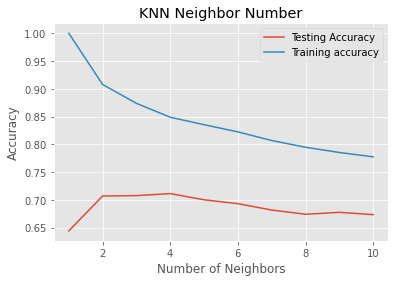

In [35]:
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN Neighbor Number')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Evaluating different parameters

In [44]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.035549657296456164
Mean Squared Error: 0.003973429329800347
Root Mean Squared Error: 0.06303514360894522
R-squared Error: 0.7111028692532566


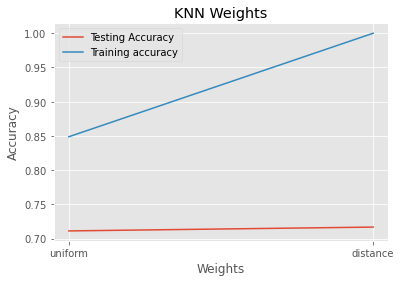

In [52]:
weights_opt = ['uniform', 'distance']
train_accuracy = np.empty(len(weights))
test_accuracy = np.empty(len(weights))

for i in range(len(weights)):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = weights_opt[i])
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN Weights')
plt.plot(weights_opt, test_accuracy, label = 'Testing Accuracy')
plt.plot(weights_opt, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Weights')
plt.ylabel('Accuracy')
plt.show()

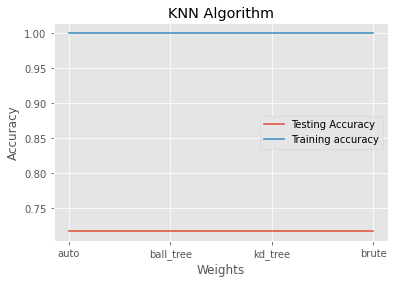

In [53]:
alg = ['auto', 'ball_tree', 'kd_tree', 'brute']
train_accuracy = np.empty(len(alg))
test_accuracy = np.empty(len(alg))

for i in range(len(alg)):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = alg[i])
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN Algorithm')
plt.plot(alg, test_accuracy, label = 'Testing Accuracy')
plt.plot(alg, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Weights')
plt.ylabel('Accuracy')
plt.show()

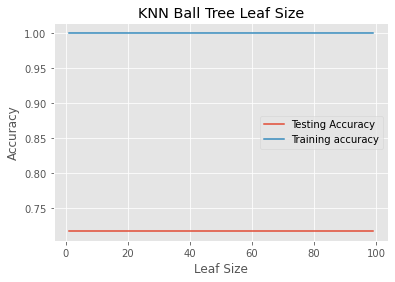

In [79]:
leaf = np.arange(1,100)
train_accuracy = np.empty(len(leaf))
test_accuracy = np.empty(len(leaf))

for i,k in enumerate(leaf):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree', leaf_size = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN Ball Tree Leaf Size')
plt.plot(leaf, test_accuracy, label = 'Testing Accuracy')
plt.plot(leaf, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.show()

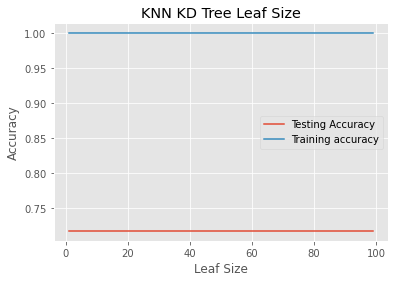

In [80]:
leaf = np.arange(1,100)
train_accuracy = np.empty(len(leaf))
test_accuracy = np.empty(len(leaf))

for i,k in enumerate(leaf):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'kd_tree', leaf_size = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN KD Tree Leaf Size')
plt.plot(leaf, test_accuracy, label = 'Testing Accuracy')
plt.plot(leaf, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.show()

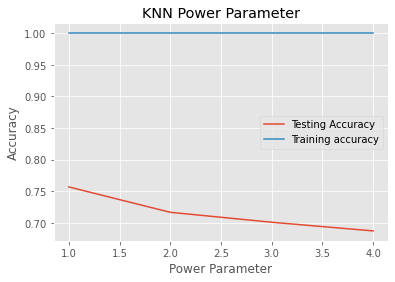

In [83]:
p = np.arange(1,5)
train_accuracy = np.empty(len(p))
test_accuracy = np.empty(len(p))

for i,k in enumerate(p):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN Power Parameter')
plt.plot(p, test_accuracy, label = 'Testing Accuracy')
plt.plot(p, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Power Parameter')
plt.ylabel('Accuracy')
plt.show()

In [84]:
knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.03316057122741931
Mean Squared Error: 0.003344340900037173
Root Mean Squared Error: 0.05783027667266666
R-squared Error: 0.7568421607467553


# Overall Accuracy of KNN Model After Testing

In [89]:
knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = 1)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print('Final Accuracy:', str(format(accuracy*100, '.3f')) + '%')

Final Accuracy: 75.684%
